# Import functions

In [1]:
import Functions  # Import all custom functions

import numpy as np
import random
import statistics
import pyedflib
import math


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



from IPython.display import display, Markdown  #display(Markdown("# Hello World!"))



* File Name: chb01_03.edf <br>
Seizure Start Time: 2996 seconds


* File Name: chb01_04.edf <br>
Seizure Start Time: 1467 seconds


* File Name: chb01_15.edf <br>
Seizure Start Time: 1732 seconds


* File Name: chb01_16.edf <br>
Seizure Start Time: 1015 seconds


* File Name: chb01_18.edf <br>
Seizure Start Time: 1720 seconds


* File Name: chb01_21.edf <br>
Seizure Start Time: 327 seconds


* File Name: chb01_26.edf <br>
Seizure Start Time: 1862 seconds

In [2]:
seizure_file_list = [ 'chb01_03.edf','chb01_04.edf', 'chb01_15.edf','chb01_16.edf',
                     'chb01_18.edf','chb01_21.edf', 'chb01_26.edf']
seizure_start_list = [2996, 1467, 1732, 1015, 1720, 327, 1862]

sample_rate = 256

## Read data and intercept 40 minutes

In [3]:
temp = Functions.readedf('./Patient01/'+seizure_file_list[0])
if (seizure_start_list[0]<40*60):
    temp_preict = temp[:,0:seizure_start_list[0]*sample_rate]
if (seizure_start_list[0]>= 40*60):
    temp_preict = temp[:,(seizure_start_list[0]-40*60)*sample_rate\
                       : seizure_start_list[0]*sample_rate]

In [6]:
for i in range(len(seizure_file_list)):
    temp = Functions.readedf('./Patient01/'+seizure_file_list[i])
    print('Successful read file', seizure_file_list[i])
    if (seizure_start_list[i]<40*60):                    # Read seiuzre signal
        temp_preictal = temp[:,0:seizure_start_list[i]*sample_rate]
    if (seizure_start_list[i]>=40*60):
        temp_preictal = temp[:,(seizure_start_list[i]-40*60)*sample_rate\
                             :seizure_start_list[i]*sample_rate]
    
    temp_preictal_window = Functions.channel_slide_windows(temp_preictal,
                                                           window_size=64*sample_rate,
                                                           window_step=32*sample_rate)
    
    temp_window_features = np.zeros((np.size(temp_preictal_window,axis=0),   # Initiate window features
                                     np.size(temp_preictal_window,axis=1),
                                     8))
    
    for j in range(np.size(temp_preictal_window,axis=0)):                 # Calculate each window's features
        for k in range(np.size(temp_preictal_window, axis=1)):
           temp_window_features[j,k,:] = Functions.get_features(temp_preictal_window[j,k,:])
        
    temp_window_features_t = np.transpose(temp_window_features,[1,0,2])   # transpose matrix
    temp_window_features_t_f = temp_window_features_t.reshape(np.size(temp_window_features_t,axis=0), # reshape matrix (# sample, # features)
                                                              np.size(temp_window_features_t,axis=1)*\
                                                              np.size(temp_window_features_t,axis=2))
    
#     if (min(temp_window_features_t_f.shape) >=64):
#         n_components = 64
#     if (min(temp_window_features_t_f.shape) <64):
#         n_components = min(temp_window_features_t_f.shape)
    
#     pca = PCA(n_components=n_components)
#     temp_window_features_t_f_pca = pca.fit_transform(temp_window_features_t_f)
#     temp_window_features_t_f_pca_norm = Functions.norm_per_sample(temp_window_features_t_f_pca)
    
    np.save(seizure_file_list[i].removesuffix('.edf')+'.npy', temp_window_features_t_f)
    print('successful store:', seizure_file_list[i].removesuffix('.edf')+'.npy')

Successful read file chb01_03.edf
successful store: chb01_03.npy
Successful read file chb01_04.edf
successful store: chb01_04.npy
Successful read file chb01_15.edf
successful store: chb01_15.npy
Successful read file chb01_16.edf
successful store: chb01_16.npy
Successful read file chb01_18.edf
successful store: chb01_18.npy
Successful read file chb01_21.edf
successful store: chb01_21.npy
Successful read file chb01_26.edf
successful store: chb01_26.npy


### Read files and concat

In [53]:
array = []
for file_path in seizure_file_list:
    loaded_array = np.load('Patient01_Siz/'+file_path.removesuffix('.edf')+'.npy')
#     print('Patient01_Siz/'+file_path.removesuffix('.edf')+'.npy')
#     print(loaded_array.shape)
    array.append(loaded_array)
    
result_array = np.concatenate(array, axis=0)

### PCA

In [56]:
n_components = 64
pca = PCA(n_components=n_components)
temp_window_features_t_f_pca = pca.fit_transform(result_array)
temp_window_features_t_f_pca_norm = Functions.norm_per_sample(temp_window_features_t_f_pca)

np.save('Patient01_siz_input.npy', temp_window_features_t_f_pca_norm)
print('successful store:', 'Patient01_siz_input.npy')

successful store: Patient01_siz_input.npy


In [3]:
Functions.concatenate_npy_files(folder_path='Patient01_Int', output_file='Patient01_int_input.npy')

# Show images

In [10]:
np.load('Patient01_siz_input.npy').shape
np.load('Patient01_int_input.npy').shape

(3850, 64)

siz: 148
int: 2502


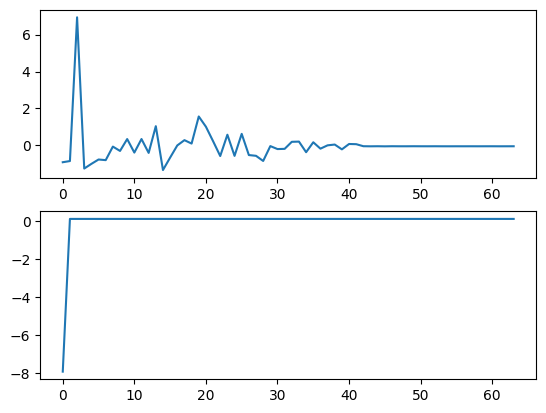

In [56]:
plt.figure()
plt.subplot(2,1,1)
index = random.randint(0,312)
print('siz:', index)
plt.plot(np.load('Patient01_siz_input.npy')[index,:])
plt.subplot(2,1,2)
index = random.randint(0,3850)
print('int:', index)
plt.plot(np.load('Patient01_int_input.npy')[index,:])

----

## Patient 07


* File Name: chb07_12.edf <br>
Seizure 1 Start Time: 4920 seconds


* File Name: chb07_13.edf <br>
Seizure 1 Start Time: 3285 seconds


* File Name: chb07_19.edf <br>
Seizure 1 Start Time: 13688 seconds

In [3]:
seizure_file_list = [ 'chb07_12.edf','chb07_13.edf', 'chb07_19.edf']
seizure_start_list = [4920, 3285, 13688]

sample_rate = 256

_____

## Patient 02

* File Name: chb02_16.edf <br>
Seizure 1 Start Time: 130 seconds


* File Name: chb02_16+.edf <br>
Seizure 1 Start Time: 2972 seconds


* File Name: chb02_19.edf <br>
Seizure 1 Start Time: 3369 seconds

In [2]:
seizure_file_list = [ 'chb02_16.edf','chb02_16+.edf', 'chb02_19.edf']
seizure_start_list = [130, 2972, 3369]

sample_rate = 256

## Read data and intercept 40 minutes

In [25]:
# temp = Functions.readedf('./Patient07/'+seizure_file_list[0])
# if (seizure_start_list[0]<40*60):
#     temp_preict = temp[:,0:seizure_start_list[0]*sample_rate]
# if (seizure_start_list[0]>= 40*60):
#     temp_preict = temp[:,(seizure_start_list[0]-40*60)*sample_rate\
#                        : seizure_start_list[0]*sample_rate]

# temp_preict.shape

(23, 308736)

In [3]:
for i in range(len(seizure_file_list)):
    temp = Functions.readedf('./Patient02/'+seizure_file_list[i])
    print('Successful read file', seizure_file_list[i])
    if (seizure_start_list[i]<40*60):                    # Read seiuzre signal
        temp_preictal = temp[:,0:seizure_start_list[i]*sample_rate]
    if (seizure_start_list[i]>=40*60):
        temp_preictal = temp[:,(seizure_start_list[i]-40*60)*sample_rate\
                             :seizure_start_list[i]*sample_rate]
    
    
    temp_preictal_window = Functions.channel_slide_windows(temp_preictal,
                                                           window_size=64*sample_rate,
                                                           window_step=32*sample_rate)
    
    temp_window_features = np.zeros((np.size(temp_preictal_window,axis=0),   # Initiate window features
                                     np.size(temp_preictal_window,axis=1),
                                     8))
    
    for j in range(np.size(temp_preictal_window,axis=0)):                 # Calculate each window's features
        for k in range(np.size(temp_preictal_window, axis=1)):
           temp_window_features[j,k,:] = Functions.get_features(temp_preictal_window[j,k,:])
        
    temp_window_features_t = np.transpose(temp_window_features,[1,0,2])   # transpose matrix
    temp_window_features_t_f = temp_window_features_t.reshape(np.size(temp_window_features_t,axis=0), # reshape matrix (# sample, # features)
                                                              np.size(temp_window_features_t,axis=1)*\
                                                              np.size(temp_window_features_t,axis=2))
    
#     if (min(temp_window_features_t_f.shape) >=64):
#         n_components = 64
#     if (min(temp_window_features_t_f.shape) <64):
#         n_components = min(temp_window_features_t_f.shape)
    
#     pca = PCA(n_components=n_components)
#     temp_window_features_t_f_pca = pca.fit_transform(temp_window_features_t_f)
#     temp_window_features_t_f_pca_norm = Functions.norm_per_sample(temp_window_features_t_f_pca)
    
    np.save(seizure_file_list[i].removesuffix('.edf')+'.npy', temp_window_features_t_f)
    print('successful store:', seizure_file_list[i].removesuffix('.edf')+'.npy')

Successful read file chb02_16.edf
successful store: chb02_16.npy
Successful read file chb02_16+.edf
successful store: chb02_16+.npy
Successful read file chb02_19.edf
successful store: chb02_19.npy


### Read files and concat

In [6]:
array = []
for file_path in seizure_file_list:
    loaded_array = np.load('Patient02_Siz/'+file_path.removesuffix('.edf')+'.npy')
#     print('Patient01_Siz/'+file_path.removesuffix('.edf')+'.npy')
#     print(loaded_array.shape)
    array.append(loaded_array)
    
result_array = np.concatenate(array, axis=0)

### PCA

In [7]:
n_components = 64
pca = PCA(n_components=n_components)
temp_window_features_t_f_pca = pca.fit_transform(result_array)
temp_window_features_t_f_pca_norm = Functions.norm_per_sample(temp_window_features_t_f_pca)

np.save('Patient02_siz_input.npy', temp_window_features_t_f_pca_norm)
print('successful store:', 'Patient02_siz_input.npy')

successful store: Patient02_siz_input.npy


In [8]:
Functions.concatenate_npy_files(folder_path='Patient02_Int', output_file='Patient02_int_input.npy')

# Show images

In [10]:
np.load('Patient02_siz_input.npy').shape, np.load('Patient02_int_input.npy').shape

((148, 64), (3630, 64))

In [11]:
plt.figure()
plt.subplot(2,1,1)
index = random.randint(0,312)
print('siz:', index)
plt.plot(np.load('Patient01_siz_input.npy')[index,:])
plt.subplot(2,1,2)
index = random.randint(0,3850)
print('int:', index)
plt.plot(np.load('Patient01_int_input.npy')[index,:])

NameError: name 'plt' is not defined